# Programming Homework 1 
###### James Amidei
----------------------------------------------

$$ \vec{F_G} = -G \frac{M m}{r^2} \hat {r}$$

###### For Cartesian Coordinates 



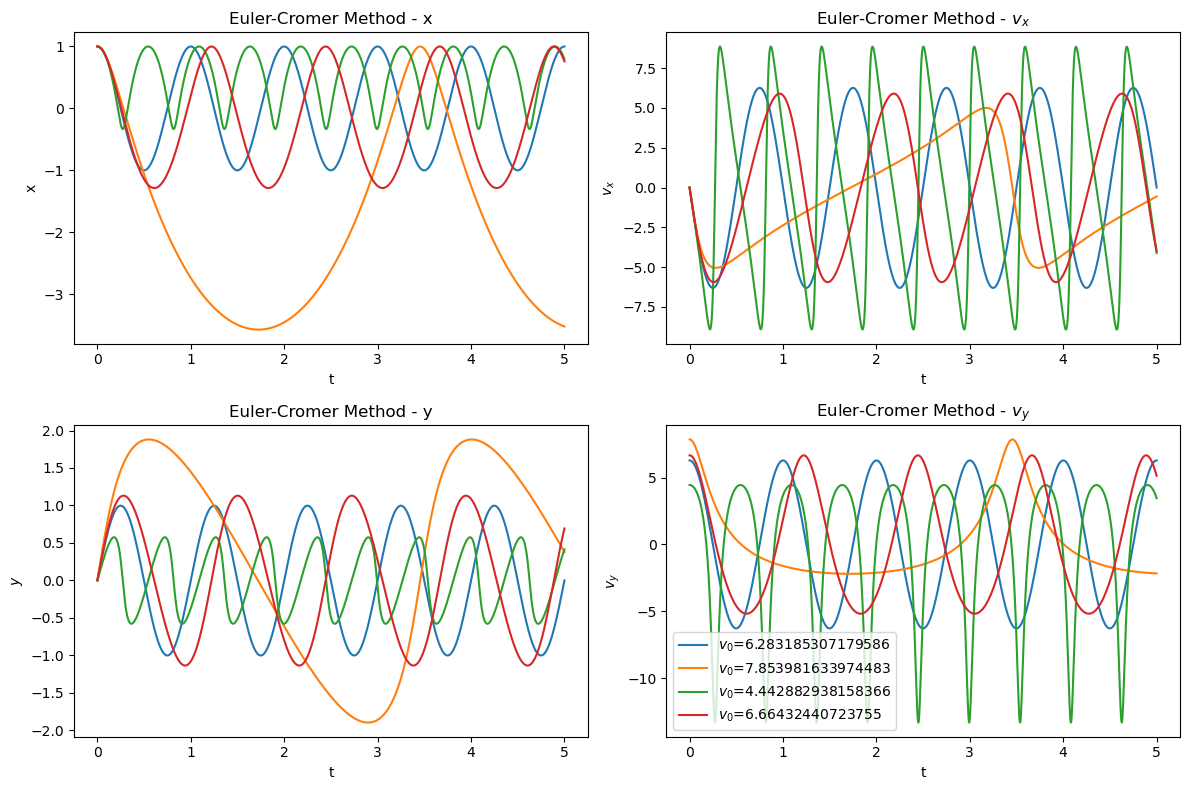

In [6]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Gravity, Orbital motion
GM = 4 * np.pi**2  # AU^3/yr^2
r0 = 1  # AU
theta0_D = 0
theta0 = theta0_D * np.pi / 180
v0_values = [2 * np.pi, 2.5 * np.pi, np.sqrt(2) * np.pi, 1.5 * np.sqrt(2) * np.pi]

del_t = 0.001
n = 5000
t = np.zeros(n + 1)

# Initialize arrays for x, vx, ax, y, vy, ay for each initial velocity
x_array = np.zeros((len(v0_values), n + 1))
vx_array = np.zeros((len(v0_values), n + 1))
ax_array = np.zeros((len(v0_values), n + 1))
y_array = np.zeros((len(v0_values), n + 1))
vy_array = np.zeros((len(v0_values), n + 1))
ay_array = np.zeros((len(v0_values), n + 1))

Flag_T = 1

for index, v0 in enumerate(v0_values):
    x = np.zeros(n + 1)
    vx = np.zeros(n + 1)
    ax = np.zeros(n + 1)

    y = np.zeros(n + 1)
    vy = np.zeros(n + 1)
    ay = np.zeros(n + 1)

    x[0] = r0 * np.cos(theta0)
    y[0] = r0 * np.sin(theta0)

    vx[0] = v0 * np.sin(theta0)
    vy[0] = v0 * np.cos(theta0)

    ax[0] = -GM * x[0] / r0**3
    ay[0] = -GM * y[0] / r0**3

    # Euler-Cromer Method
    for i in range(0, n):
        t[i + 1] = (i + 1) * del_t

        # x-direction:
        vx[i + 1] = vx[i] + ax[i] * del_t
        x[i + 1] = x[i] + vx[i + 1] * del_t

        # y-direction:
        vy[i + 1] = vy[i] + ay[i] * del_t
        y[i + 1] = y[i] + vy[i + 1] * del_t

        del_x = x[i + 1] - x[i]
        if x[i + 1] == 0 or (x[i + 1] <= abs(del_x) and x[i + 1] >= -abs(del_x)):
            c = y[i + 1]

        if Flag_T == 1 and t[i] > 0 and np.sign(y[i + 1]) != np.sign(y[i]) and x[i] > 0:
            T = t[i + 1]
            Flag_T = 0

        r = np.sqrt(x[i + 1]**2 + y[i + 1]**2)

        ax[i + 1] = -GM * x[i + 1] / r**3
        ay[i + 1] = -GM * y[i + 1] / r**3

    x_array[index, :] = x
    vx_array[index, :] = vx
    ax_array[index, :] = ax
    y_array[index, :] = y
    vy_array[index, :] = vy
    ay_array[index, :] = ay

# Plotting
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
for i, v0 in enumerate(v0_values):
    plt.plot(t, x_array[i, :], label=f'$v_0$={v0}')
plt.xlabel('t')
plt.ylabel('x')
plt.title('Euler-Cromer Method - x')

plt.subplot(2, 2, 2)
for i, v0 in enumerate(v0_values):
    plt.plot(t, vx_array[i, :], label=f'$v_0$={v0}')
plt.xlabel('t')
plt.ylabel('$v_x$')
plt.title('Euler-Cromer Method - $v_x$')

plt.subplot(2, 2, 3)
for i, v0 in enumerate(v0_values):
    plt.plot(t, y_array[i, :], label=f'$v_0$={v0}')
plt.xlabel('t')
plt.ylabel('$y$')
plt.title('Euler-Cromer Method - y')

plt.subplot(2, 2, 4)
for i, v0 in enumerate(v0_values):
    plt.plot(t, vy_array[i, :], label=f'$v_0$={v0}')
plt.xlabel('t')
plt.ylabel('$v_y$')
plt.title('Euler-Cromer Method - $v_y$')

plt.tight_layout()
plt.legend()
plt.show()


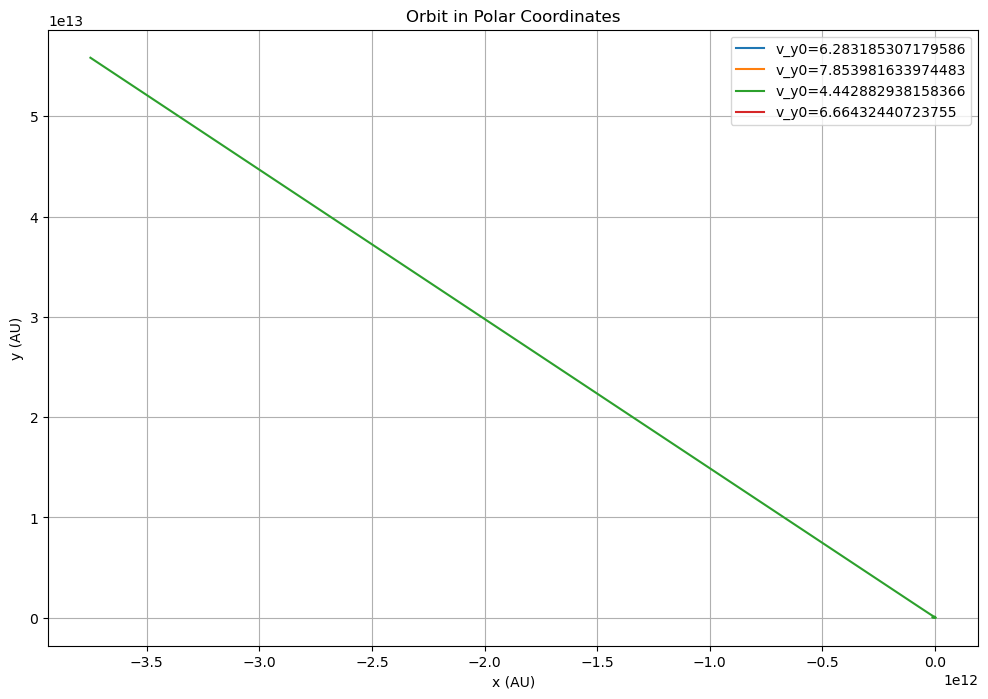

In [5]:
def ec_polar(r_0, theta_0, vr_0, vtheta_0, dt, n):
    r = np.zeros(n)
    theta = np.zeros(n)
    vr = np.zeros(n)
    vtheta = np.zeros(n)

    r[0] = r_0
    theta[0] = theta_0
    vr[0] = vr_0
    vtheta[0] = vtheta_0

    for i in range(1, n):
        ar = -(GM / r[i-1]**2) + r[i-1]*(vtheta[i-1])**2
        atheta = -2*vr[i-1]*vtheta[i-1] / r[i-1]

        vr[i] = vr[i-1] + ar*dt
        vtheta[i] = vtheta[i-1] + atheta*dt

        r[i] = r[i-1] + vr[i]*dt
        theta[i] = theta[i-1] + vtheta[i]*dt

    return r, theta

plt.figure(figsize=(12, 8))

for vy_0 in vy_0_values:
    r, theta = ec_polar(x_0, 0, 0, vy_0 / x_0, dt, n)
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    plt.plot(x, y, label=f'v_y0={vy_0}')

plt.title('Orbit in Polar Coordinates')
plt.xlabel('x (AU)')
plt.ylabel('y (AU)')
plt.legend()
plt.grid(True)
plt.show()

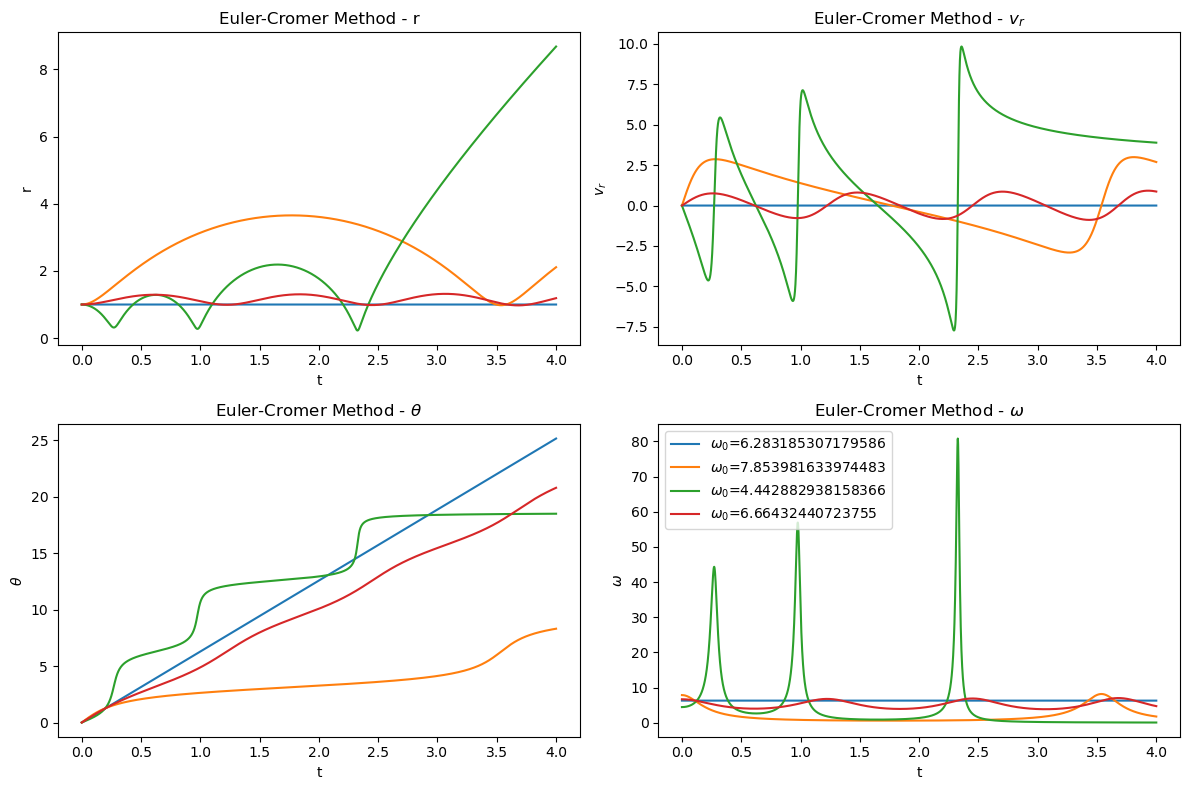

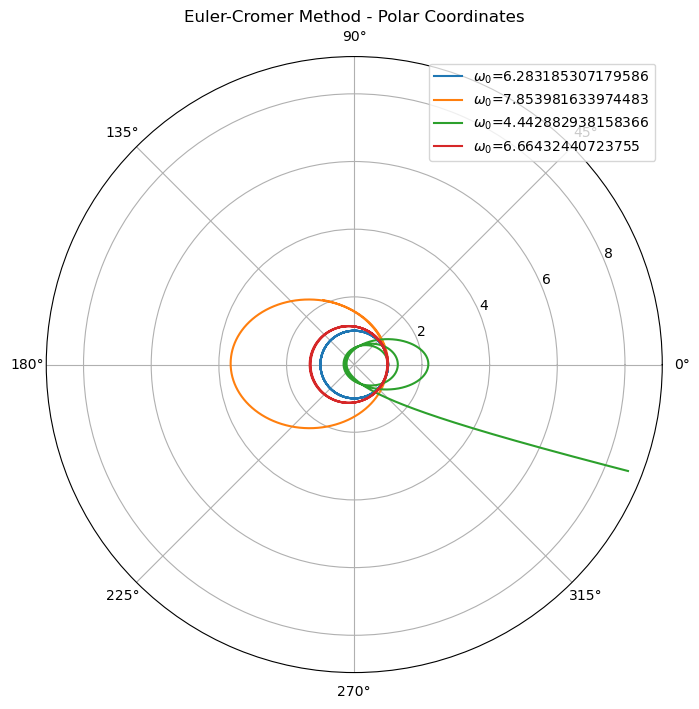

In [7]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Gravity, Orbital motion
GM = 4 * np.pi**2  # AU^3/yr^2
r0 = 1  # AU
theta0_D = 0
theta0 = theta0_D * np.pi/180

vr0 = 0
omega0_values = [2 * np.pi, 2.5 * np.pi, np.sqrt(2) * np.pi, 1.5 * np.sqrt(2) * np.pi]

del_t = 0.001
n = 4000
t = np.zeros(n + 1)

# Initialize arrays for r, vr, ar, theta, omega, alpha, x, y for each initial angular velocity
r_array = np.zeros((len(omega0_values), n + 1))
vr_array = np.zeros((len(omega0_values), n + 1))
ar_array = np.zeros((len(omega0_values), n + 1))
theta_array = np.zeros((len(omega0_values), n + 1))
omega_array = np.zeros((len(omega0_values), n + 1))
alpha_array = np.zeros((len(omega0_values), n + 1))
x_array = np.zeros((len(omega0_values), n + 1))
y_array = np.zeros((len(omega0_values), n + 1))

for index, omega0 in enumerate(omega0_values):
    r = np.zeros(n + 1)
    vr = np.zeros(n + 1)
    ar = np.zeros(n + 1)

    theta = np.zeros(n + 1)
    omega = np.zeros(n + 1)
    alpha = np.zeros(n + 1)

    x = np.zeros(n + 1)
    y = np.zeros(n + 1)

    r[0] = r0
    theta[0] = theta0

    vr[0] = vr0
    omega[0] = omega0

    ar[0] = -GM / r[0]**2 + r[0] * omega[0]**2
    alpha[0] = -2 * vr[0] * omega[0] / r[0]

    x[0] = r[0] * np.cos(theta[0])
    y[0] = r[0] * np.sin(theta[0])

    # Euler-Cromer Method
    for i in range(0, n):
        t[i + 1] = (i + 1) * del_t

        # r:
        vr[i + 1] = vr[i] + ar[i] * del_t
        r[i + 1] = r[i] + vr[i + 1] * del_t

        # theta:
        omega[i + 1] = omega[i] + alpha[i] * del_t
        theta[i + 1] = theta[i] + omega[i + 1] * del_t

        ar[i + 1] = -GM / r[i + 1]**2 + r[i + 1] * omega[i + 1]**2
        alpha[i + 1] = -2 * vr[i + 1] * omega[i + 1] / r[i + 1]

        x[i + 1] = r[i + 1] * np.cos(theta[i + 1])
        y[i + 1] = r[i + 1] * np.sin(theta[i + 1])

        del_theta = theta[i + 1] - theta[i]
        if theta[i + 1] == np.pi / 2 or (theta[i + 1] <= np.pi / 2 + abs(del_theta) and theta[i + 1] >= np.pi / 2 - abs(del_theta)):
            c = y[i + 1]

    r_array[index, :] = r
    vr_array[index, :] = vr
    ar_array[index, :] = ar
    theta_array[index, :] = theta
    omega_array[index, :] = omega
    alpha_array[index, :] = alpha
    x_array[index, :] = x
    y_array[index, :] = y

# Plotting
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
for i, omega0 in enumerate(omega0_values):
    plt.plot(t, r_array[i, :], label=f'$\omega_0$={omega0}')
plt.xlabel('t')
plt.ylabel('r')
plt.title('Euler-Cromer Method - r')

plt.subplot(2, 2, 2)
for i, omega0 in enumerate(omega0_values):
    plt.plot(t, vr_array[i, :], label=f'$\omega_0$={omega0}')
plt.xlabel('t')
plt.ylabel('$v_r$')
plt.title('Euler-Cromer Method - $v_r$')

plt.subplot(2, 2, 3)
for i, omega0 in enumerate(omega0_values):
    plt.plot(t, theta_array[i, :], label=f'$\omega_0$={omega0}')
plt.xlabel('t')
plt.ylabel('$\\theta$')
plt.title('Euler-Cromer Method - $\\theta$')

plt.subplot(2, 2, 4)
for i, omega0 in enumerate(omega0_values):
    plt.plot(t, omega_array[i, :], label=f'$\omega_0$={omega0}')
plt.xlabel('t')
plt.ylabel('$\omega$')
plt.title('Euler-Cromer Method - $\omega$')

plt.tight_layout()
plt.legend()
plt.show()

# Polar plot
plt.figure(figsize=(8, 8))
plt.axes(projection='polar')
for i, omega0 in enumerate(omega0_values):
    plt.polar(theta_array[i, :], r_array[i, :], label=f'$\omega_0$={omega0}')
plt.title('Euler-Cromer Method - Polar Coordinates')
plt.legend()
plt.show()
